In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create URL endpoint for city
    city_url = url + '&q=' + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | richards bay
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | raudeberg
Processing Record 7 of Set 1 | baymak
Processing Record 8 of Set 1 | half moon bay
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | silver city
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | strezhevoy
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | tiarei
Processing Record 20 of Set 1 | matara
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | cape town
Processing Reco

Processing Record 39 of Set 4 | peleduy
Processing Record 40 of Set 4 | mombaca
Processing Record 41 of Set 4 | barabash
Processing Record 42 of Set 4 | luang prabang
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | roma
Processing Record 45 of Set 4 | maykain
City not found. Skipping...
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | keningau
Processing Record 48 of Set 4 | pasighat
Processing Record 49 of Set 4 | yerbogachen
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 5 | bud
Processing Record 3 of Set 5 | guerrero negro
Processing Record 4 of Set 5 | ugoofaaru
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | kosa
Processing Record 7 of Set 5 | leh
Processing Record 8 of Set 5 | nabire
Processing Record 9 of Set 5 | ballina
Processing Record 10 of Set 5 | rock springs
Processing Record 11 of Set 5 | bethanien
Processing 

Processing Record 32 of Set 8 | san joaquin
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | shugurovo
Processing Record 35 of Set 8 | bestobe
Processing Record 36 of Set 8 | santiago de chuco
Processing Record 37 of Set 8 | pendleton
Processing Record 38 of Set 8 | touros
Processing Record 39 of Set 8 | nowy dwor mazowiecki
Processing Record 40 of Set 8 | salalah
Processing Record 41 of Set 8 | mackay
Processing Record 42 of Set 8 | kabare
Processing Record 43 of Set 8 | pisco
Processing Record 44 of Set 8 | poum
Processing Record 45 of Set 8 | hihifo
City not found. Skipping...
Processing Record 46 of Set 8 | kalmar
Processing Record 47 of Set 8 | kadhan
Processing Record 48 of Set 8 | vao
Processing Record 49 of Set 8 | tawau
Processing Record 50 of Set 8 | lower hutt
Processing Record 1 of Set 9 | khuzdar
Processing Record 2 of Set 9 | kalmunai
Processing Record 3 of Set 9 | apango
Processing Record 4 of Set 9 | petropavlovsk-kamchatskiy
Processing Record 5 

Processing Record 19 of Set 12 | maryanovka
City not found. Skipping...
Processing Record 20 of Set 12 | zhigansk
Processing Record 21 of Set 12 | whitehorse
Processing Record 22 of Set 12 | fortuna
Processing Record 23 of Set 12 | starobachaty
Processing Record 24 of Set 12 | tambun
Processing Record 25 of Set 12 | nueva helvecia
Processing Record 26 of Set 12 | green river
Processing Record 27 of Set 12 | palu
Processing Record 28 of Set 12 | brae
Processing Record 29 of Set 12 | kiama
Processing Record 30 of Set 12 | darhan
Processing Record 31 of Set 12 | kajaani
Processing Record 32 of Set 12 | ye
City not found. Skipping...
Processing Record 33 of Set 12 | san giovanni rotondo
Processing Record 34 of Set 12 | keffi
Processing Record 35 of Set 12 | kwinana
Processing Record 36 of Set 12 | vacaria
Processing Record 37 of Set 12 | bosaso
Processing Record 38 of Set 12 | aitape
Processing Record 39 of Set 12 | shache
Processing Record 40 of Set 12 | la ronge
Processing Record 41 of S

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,97.05,30,38,7.76,AU,2022-02-03 07:39:44
1,Kavieng,-2.5744,150.7967,80.28,79,100,12.26,PG,2022-02-03 07:37:09
2,Richards Bay,-28.7830,32.0377,90.28,52,9,9.44,ZA,2022-02-03 07:39:45
3,Dikson,73.5069,80.5464,-10.75,98,93,10.87,RU,2022-02-03 07:39:46
4,Ushuaia,-54.8000,-68.3000,40.66,65,75,20.71,AR,2022-02-03 07:37:23
5,Raudeberg,61.9875,5.1352,35.87,82,100,5.99,NO,2022-02-03 07:39:47
6,Baymak,52.5933,58.3225,21.87,95,99,8.39,RU,2022-02-03 07:39:47
7,Half Moon Bay,37.4636,-122.4286,55.62,50,0,3.44,US,2022-02-03 07:39:48
8,Silver City,32.7701,-108.2803,27.68,90,0,5.75,US,2022-02-03 07:39:49
9,Puerto Ayora,-0.7393,-90.3518,73.54,93,17,3.00,EC,2022-02-03 07:39:49


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

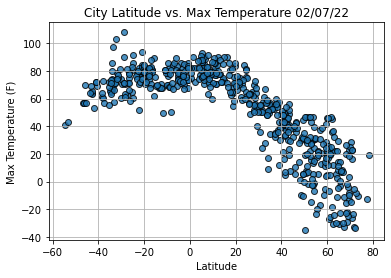

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

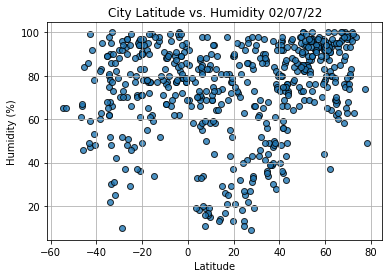

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

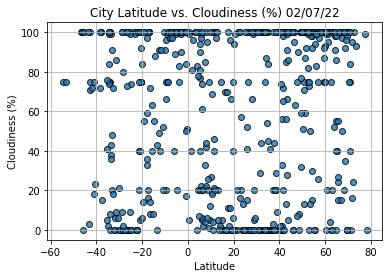

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

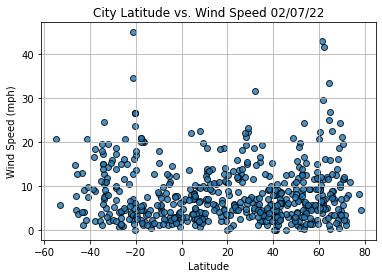

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                    Carnarvon
Lat                      -24.8667
Lng                      113.6333
Max Temp                    86.07
Humidity                       66
Cloudiness                      0
Wind Speed                  20.71
Country                        AU
Date          2022-02-03 07:39:53
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

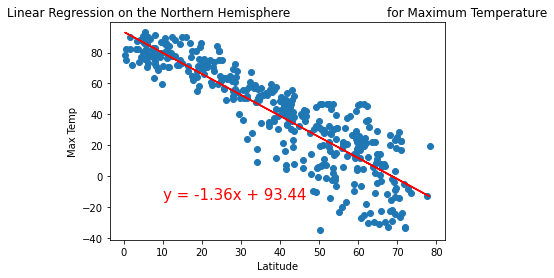

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-15))

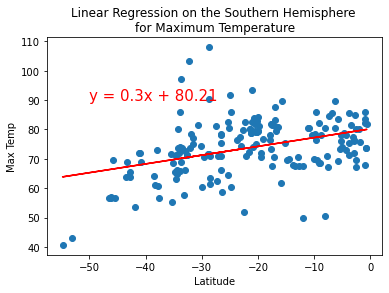

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

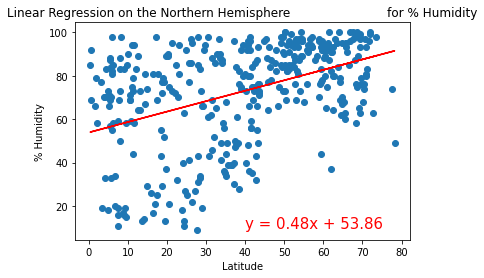

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

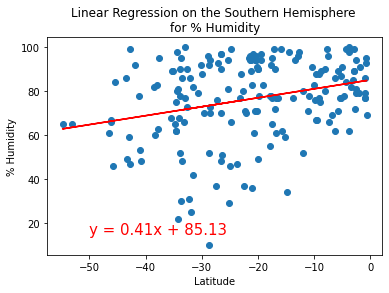

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

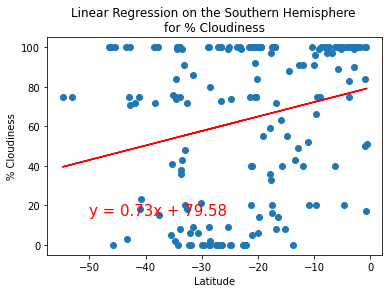

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

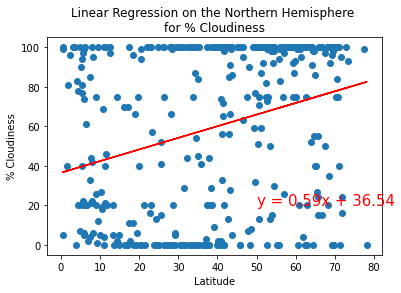

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(50,20))

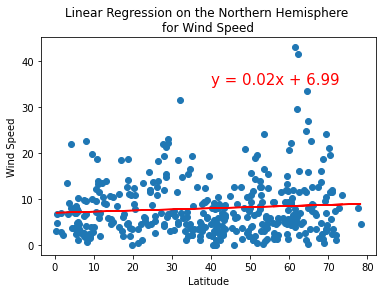

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

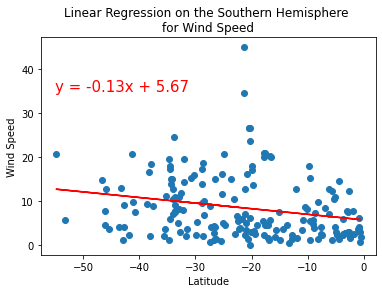

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-55,35))